In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [19]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)


In [20]:
X

array([[ 0.31346891, -0.22912504],
       [ 1.1584058 ,  0.16581505],
       [ 0.27511962,  1.6006069 ],
       ...,
       [-0.10358973,  1.37447624],
       [-0.76274638,  0.93704191],
       [-0.96522941, -0.77857816]])

In [21]:
y

array([-1.00925890e+01,  9.83539007e+00,  7.95507226e+01,  7.98641523e+00,
       -9.98025556e+00, -1.03133840e+01, -5.70219724e+01, -9.15145998e+01,
       -8.53723617e+00, -2.44198947e+01, -7.61435760e+01, -2.52907858e+01,
       -1.34896841e+02, -1.12147809e+02, -1.18870385e+02, -6.79305808e+01,
       -9.55136803e+01,  8.72019611e+01, -2.31971851e+00,  2.96151539e+01,
       -1.68802301e+01, -1.68011825e+01, -3.54065989e+01, -2.59590440e+01,
       -1.22476921e+01,  2.95108747e+01, -6.39429962e+01, -3.90236378e+01,
        1.02336922e+02, -4.43628288e+01, -3.13581438e+00,  1.23477933e+01,
        4.43346518e+01, -1.42767533e+01,  1.10078867e+01,  5.67821173e+01,
        1.26581757e+01, -1.08477532e+01, -2.52300057e+01,  4.67993346e+01,
        1.06626843e+01,  2.42469161e+01, -2.80153242e+01, -1.15546440e+02,
        3.43867949e+01, -4.72886958e+01, -2.41709269e+01,  8.66906789e+00,
       -6.48049667e+00,  1.22541978e+01, -7.81039536e+00, -5.51652623e+01,
       -2.11296907e+01, -

In [22]:
pd.DataFrame(X)[0]


0      0.313469
1      1.158406
2      0.275120
3      0.607826
4     -0.888961
         ...   
995    1.551656
996   -0.894379
997   -0.103590
998   -0.762746
999   -0.965229
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

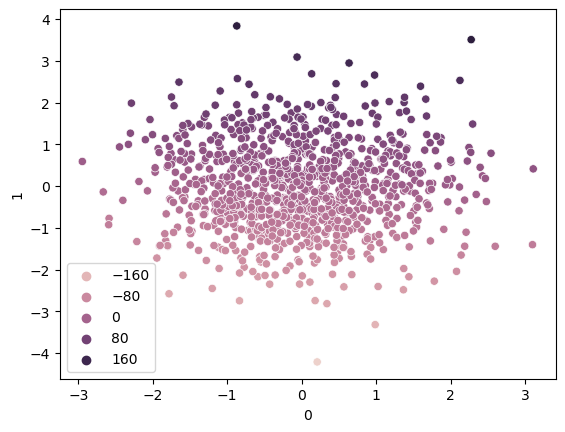

In [23]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [26]:
from sklearn.svm import SVR

In [27]:
svr=SVR(kernel='linear')

In [28]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [29]:
svr.coef_

array([[ 4.59121392, 48.12391785]])

In [30]:
## Prediction
y_pred=svr.predict(X_test)

In [31]:
y_pred

array([  88.4379063 ,   26.15964284,  -13.61958356,   27.10900043,
        -45.79666736,  -12.68993853,   11.76130313,    3.13184359,
        -28.09951072,  -23.75249253,  -14.04035667,   -2.97564343,
         18.39971234,  -56.85269827,  -15.83387549,   50.02158573,
         37.49051272,   -4.83070814,  -57.59272308,  -74.88500043,
         39.22301473,  -11.93789034,  -39.5114719 ,  131.51848374,
         35.01626535,  -91.98342747,  -22.42221533,   -8.47738561,
         17.01567523,  -62.52715805,  -54.04650063,  -33.21943457,
         36.72528836,   66.82697559,    8.58564644,   55.19015362,
        -84.1661789 ,   43.73204861,  -27.89507856,   77.14432315,
         71.70203469,   82.92798225,   62.46106969,  -74.68163188,
         -1.82957264,  -32.52179647,  -43.48936052,   21.17878639,
        -79.8009787 ,  112.20678514,  -38.35342973,  -16.24906327,
        -52.042998  ,  -60.90272174,  -90.08127132,  -59.78667539,
         25.51620959,  -19.99104947,  -44.63453219,  -33.54904

In [32]:
from sklearn.metrics import r2_score

In [33]:
print(r2_score(y_test,y_pred))

0.9962942078372994


## Hyperparameter Tuning With SVR

In [35]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]}

In [36]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)


In [37]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.982 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.982 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[C

[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.996 total time=   

[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 3

[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.996 total time=   0.4s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.997 total time=   0.5s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.996 total time=   0.5s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.997 total time=   0.4s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.996 total time=   0.4s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.5s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.5s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.5s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.4s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.4s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [38]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [39]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9963542604127683
